Problem 1

In [9]:
import sympy as sy
import math
import numpy as np
from matplotlib import pyplot as plt
from pylab import *
import warnings
warnings.filterwarnings("ignore")
x = sy.symbols('x')
f = (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
g = sy.lambdify(x, f) #lambdify the original function 

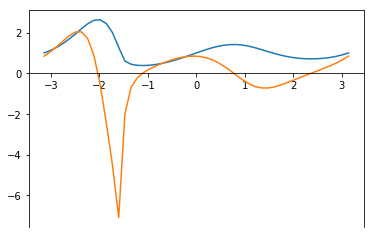

In [10]:
f_p = sy.diff(f, x)
g_p = sy.lambdify(x, f_p) #lambdify the derivative 
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
xval = np.linspace(-math.pi, math.pi)
yval1 = g(xval)
yval2 = g_p(xval)
ax.plot(xval, yval1)
ax.plot(xval, yval2)

Problem 2

In [11]:
def f1(f, x, h):
    return [(f(p + h) - f(p)) / h for p in x]  

In [12]:
def f2(f, x, h):
    return [(-3*f(p) + 4*f(p + h) - f(p + 2*h)) / (2*h) for p in x]     

In [13]:
def f3(f, x, h):
    return [(f(p) - f(p - h)) / h for p in x]

In [14]:
def f4(f, x, h):
    return [(3*f(p) - 4*f(p - h) + f(p - 2*h)) / (2*h) for p in x]

In [15]:
def f5(f, x, h):
    return [(f(p + h) - f(p - h)) / (2*h) for p in x]

In [16]:
def f6(f, x, h):
    return [(f(p - 2*h) - 8*f(p - h) + 8*f(p + h) - f(p + 2*h)) / (12*h) for p in x]

In [17]:
x_val = np.linspace(-math.pi, math.pi)

In [18]:
y_val = [(math.sin(x) + 1) ** (math.sin(math.cos(x))) for x in x_val]

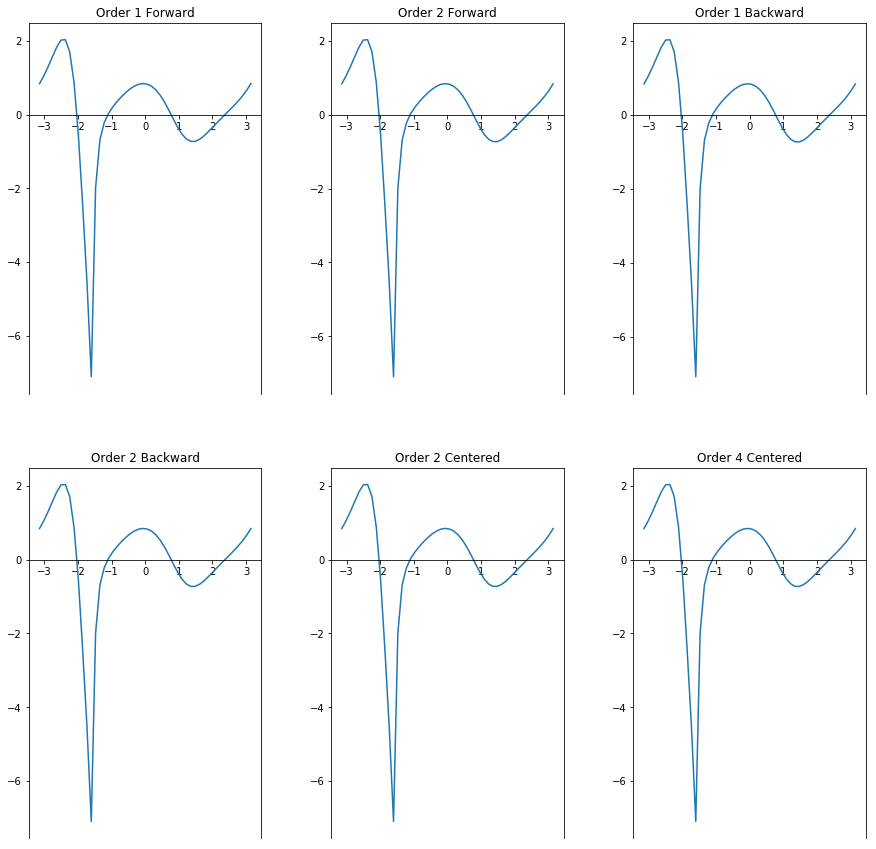

In [19]:
def f(x):
    return (math.sin(x) + 1)**(math.sin(math.cos(x)))

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,15))
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:   
    ax.spines["bottom"].set_position("zero")
ax1.plot(x_val, f1(f, x_val, h=0.001))
ax2.plot(x_val, f2(f, x_val, h=0.001))
ax3.plot(x_val, f3(f, x_val, h=0.001))
ax4.plot(x_val, f4(f, x_val, h=0.001))
ax5.plot(x_val, f5(f, x_val, h=0.001))
ax6.plot(x_val, f6(f, x_val, h=0.001))

ax1.set_title("Order 1 Forward")
ax2.set_title("Order 2 Forward")
ax3.set_title("Order 1 Backward")
ax4.set_title("Order 2 Backward")
ax5.set_title("Order 2 Centered")
ax6.set_title("Order 4 Centered")
subplots_adjust(wspace = 0.3)

From the plot, we can see that the results of the six functions are almost the same as the result in problem 1.

Problem 3

I redifined the six functions in problem 2 to accept a single float point value x_0 as input.

In [20]:
def f1(f, x_0, h):
    return (f(x_0 + h) - f(x_0))/ h

In [21]:
def f2(f, x_0, h):
    return (-3*f(x_0) + 4*f(x_0 + h) - f(x_0 + 2*h)) / (2*h)      

In [22]:
def f3(f, x_0, h):
    return ((f(x_0) - f(x_0 - h)) / h)

In [23]:
def f4(f, x_0, h):
    return (3*f(x_0) - 4*f(x_0 - h) + f(x_0 - 2*h)) / (2*h)

In [24]:
def f5(f, x_0, h):
    return (f(x_0 + h) - f(x_0 - h)) / (2*h)

In [25]:
def f6(f, x_0, h):
    return (f(x_0 - 2*h) - 8*f(x_0 - h) + 8*f(x_0 + h) - f(x_0 + 2*h)) / (12*h)

In [26]:
def ps3(x_0):
    h_range = np.logspace(-8,0,9)
    plt.plot(h_range, abs(g_p(x_0) - [f1(f, x_0, h) for h in h_range]), label="Order 1 Forward", marker="o")   
    plt.plot(h_range, abs(g_p(x_0) - [f2(f, x_0, h) for h in h_range]), label="Order 2 Forward", marker="o")  
    plt.plot(h_range, abs(g_p(x_0) - [f3(f, x_0, h) for h in h_range]), label="Order 1 Backward", marker="o")   
    plt.plot(h_range, abs(g_p(x_0) - [f4(f, x_0, h) for h in h_range]), label="Order 2 Backward", marker="o") 
    plt.plot(h_range, abs(g_p(x_0) - [f5(f, x_0, h) for h in h_range]), label="Order 2 Centered", marker="o")   
    plt.plot(h_range, abs(g_p(x_0) - [f6(f, x_0, h) for h in h_range]), label="Order 4 Centered", marker="o") 
    plt.legend(loc="upper left")
    plt.loglog()
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.show()  

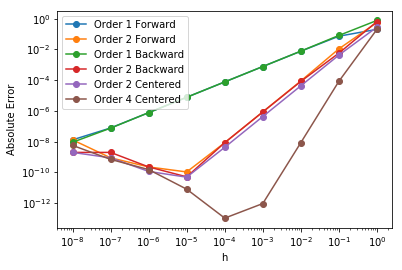

In [27]:
ps3(1)

Problem 4

In [20]:
import pandas as pd
data=np.load('plane.npy',encoding = "latin1")
radar = pd.DataFrame(data, columns=['t','alpha','beta'])
radar['alpha']

0    56.25
1    55.53
2    54.80
3    54.06
4    53.34
5    52.69
6    51.94
7    51.28
Name: alpha, dtype: float64

In [21]:
radar['alpha'] = np.deg2rad(radar['alpha'])
radar['beta'] = np.deg2rad(radar['beta'])
a = 500
radar['alpha']

0    0.981748
1    0.969181
2    0.956440
3    0.943525
4    0.930959
5    0.919614
6    0.906524
7    0.895005
Name: alpha, dtype: float64

In [22]:
radar['x(t)'] = (a * np.tan(radar['beta']) )/ \
                (np.tan(radar['beta']) - np.tan(radar['alpha']))

In [23]:
radar['y(t)'] = a * np.tan(radar['beta']) * np.tan(radar['alpha'])/ \
                (np.tan(radar['beta']) - np.tan(radar['alpha']))
radar['x_p(t)'] = None
radar['y_p(t)'] = None

In [24]:
radar['x_p(t)'][0] = (radar['x(t)'][1] - radar['x(t)'][0])/\
                     (radar['t'][1] - radar['t'][0])
radar['y_p(t)'][0] = (radar['y(t)'][1] - radar['y(t)'][0])/\
                     (radar['t'][1] - radar['t'][0])

In [25]:
radar['x_p(t)'][7] = (radar['x(t)'][7] - radar['x(t)'][6])/\
                     (radar['t'][7] - radar['t'][6])
radar['y_p(t)'][7] = (radar['y(t)'][7] - radar['y(t)'][6])/\
                     (radar['t'][7] - radar['t'][6])

In [26]:
for i in range(1, 7):
    radar['x_p(t)'][i] = (radar['x(t)'][i+1] - radar['x(t)'][i-1])/\
                        (radar['t'][i+1] - radar['t'][i-1])
    radar['y_p(t)'][i] = (radar['y(t)'][i+1] - radar['y(t)'][i-1])/\
                     (radar['t'][i+1] - radar['t'][i-1])

In [27]:
radar['speed'] = (radar['x_p(t)']**2 + radar['y_p(t)']**2)**(1/2)

In [28]:
radar

,t,alpha,beta,x(t),y(t),x_p(t),y_p(t),speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44.6651,12.6583,46.4242
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45.3235,12.4449,47.001
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47.2803,12.8631,48.9988
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48.361,13.0832,50.0994
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46.651,12.4758,48.2904
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49.7005,13.7391,51.5646
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51.8986,14.6367,53.923
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49.5547,14.075,51.5148


In [29]:
radar[['t','speed']]

,t,speed
0,7.0,46.4242
1,8.0,47.001
2,9.0,48.9988
3,10.0,50.0994
4,11.0,48.2904
5,12.0,51.5646
6,13.0,53.923
7,14.0,51.5148


Problem 5

In [43]:
def Jac(func,pt,h):
    n=len(func)
    dim=len(pt)
    I=np.identity(dim)
    J = np.zeros((n,dim))
    for i,fu in enumerate(func):
        for j,s in enumerate(pt):
            f= sy.lambdify((x,y), fu, 'numpy')
            right=pt+h*I[:,j]
            left=pt-h*I[:,j]
            J[i,j]=(f(right[0],right[1])-f(left[0],left[1]))/(2*h)
    return J
x,y = sy.Symbol('x'), sy.Symbol('y')
function = x**2, x**3-y
X = [1,1]
pt=[1,1]
h=0.01
Jac(function,pt,h)

array([[ 2.    ,  0.    ],
       [ 3.0001, -1.    ]])

Problem 7

In [73]:
from autograd import numpy as anp
from autograd import grad
import time


In [94]:
def Time(N): 
    t1 = np.zeros(N,dtype='float')
    t2 = np.zeros(N,dtype='float')
    t3 = np.zeros(N,dtype='float')
    abs_e1 = np.array([1e-18] * N)
    abs_e2 = np.zeros(N,dtype='float')
    abs_e3 = np.zeros(N,dtype='float')
    
    y = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x))) 
    auto_yprime = grad(y)
    for i in range(N):
        x = np.random.uniform(-math.pi, math.pi)
        time1 = time.clock()
        z =sy.symbols('z')
        yprime = sy.diff((sy.sin(z)+1)**sy.sin(sy.cos(z)), z)
        fprime = sy.lambdify(z, yprime, "numpy")
        prime = fprime(x)
        time2 = time.clock()
        t1[i] = time2 - time1
        time3 = time.clock()
        appr_prime = f6(g, x, h = 0.00001)
        time4 = time.clock()
        t2[i] = time4 - time3
        abs_e2[i] = abs(appr_prime - prime)
        time5 = time.clock()
        auto_appr_prime = auto_yprime(x)
        time6 = time.clock()
        t3[i] = time6 - time5
        abs_e3[i] = abs(auto_appr_prime- prime)
    return t1, t2, t3, abs_e1, abs_e2, abs_e3


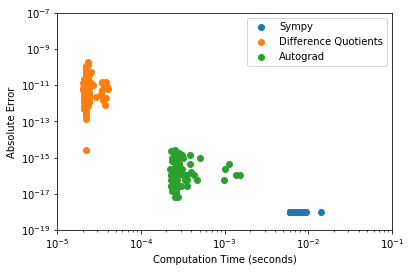

In [95]:
t1, t2, t3, abs_e1, abs_e2, abs_e3 = Time(200)

plt.scatter(t1, abs_e1, label='Sympy') 
plt.scatter(t2 ,abs_e2, label='Difference Quotients') 
plt.scatter(t3, abs_e3, label='Autograd')
plt.loglog()
plt.xlim(10**-5,10**-1)
plt.ylim(10**-19,10**-7)
plt.xlabel("Computation Time (seconds)")
plt.ylabel("Absolute Error")
plt.legend()